In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
from datetime import timedelta

import seaborn as sns
sns.set_palette("mako")
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

plotsize = (15, 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
if os.getcwd() == '/content':
  os.chdir('drive/MyDrive/DataTeam1/Index1/FactorAnalysis')

Mounted at /content/drive


In [ ]:
index1 = pd.read_csv('Indexes/Index-1.csv')

index1["Date"] = pd.to_datetime(index1["Month"])
index1 = index1.set_index('Date')
index1.index = index1.index.to_period('M')

index1["Standardized_index1"] = zscore(index1["Manufacturing"])

In [ ]:
index2 = pd.read_csv('Indexes/Index-2.csv',skiprows=2)

index2["Date"] = pd.to_datetime(index2["Unnamed: 0"], format='%m/%d/%Y', errors='coerce')
index2 = index2.dropna()
index2 = index2.set_index('Date')
index2_monthly = index2["S.F."].resample('M').mean()

index2_monthly = index2_monthly.to_frame().reset_index().rename(columns={'index': 'Date', 0: 'S.F'})
index2_monthly = index2_monthly.set_index('Date')
index2_monthly.index = index2_monthly.index.to_period('M')

index2_monthly["Standardized_index2"] = zscore(index2_monthly["S.F."])
index2 = index2_monthly

In [ ]:
index3 = pd.read_csv('Indexes/Index-3.csv')

index3["Date"] = pd.to_datetime(index3["DATE"])
index3 = index3.set_index('Date')
index3.index = index3.index.to_period('M')

index3["Standardized_index3"] = zscore(index3["ACOGNO"])
index3["Standardized_index3"] = index3["Standardized_index3"].resample('M').mean()

In [ ]:
index4 = pd.read_csv('Indexes/Index-4.csv')

index4["Date"] = pd.to_datetime(index4["DATE"])
index4 = index4.sort_values('Date')
index4 = index4.set_index('Date')
index4.index = index4.index.to_period('M')

index4["Standardized_index4"] = zscore(index4["VALUE"])
index4["Standardized_index4"] = index4["Standardized_index4"].resample('M').mean()

In [ ]:
index5 = pd.read_csv('Indexes/Index-5.csv')

index5["Date"] = pd.to_datetime(index5["DATE"])
index5 = index5.set_index('Date')
index5.index = index5.index.to_period('M')

index5["Standardized_index5"] = zscore(index5["NEWORDER"])
index5["Standardized_index5"] = index5["Standardized_index5"].resample('M').mean()

In [ ]:
index6 = pd.read_csv('Indexes/Index-6.csv')

index6["Date"] = pd.to_datetime(index6["observation_date"])
index6 = index6.set_index('Date')
index6.index = index6.index.to_period('M')

index6["Standardized_index6"] = zscore(index6["PERMIT"])
index6["Standardized_index6"] = index6["Standardized_index6"].resample('M').mean()

In [ ]:
index7 = pd.read_csv('Indexes/Index-7.csv')

index7["Date"] = pd.to_datetime(index7["DATE"])
index7 = index7.set_index('Date')

index7["SP500_new"] = pd.to_numeric(index7["SP500"], errors='coerce')
index7 = index7.dropna()

index7_monthly = index7["SP500_new"].resample('M').mean()

index7_monthly = index7_monthly.to_frame().reset_index().rename(columns={'index': 'Date', 0: 'SP500'})
index7_monthly = index7_monthly.set_index('Date')
index7_monthly.index = index7_monthly.index.to_period('M')

index7_monthly["Standardized_index7"] = zscore(index7_monthly["SP500_new"])
index7 = index7_monthly

In [ ]:
index8 = pd.read_csv('Indexes/Index-8.csv')

index8["Date"] = pd.to_datetime(index8["DATE"])
index8 = index8.set_index('Date')

index8_monthly = index8["NFCICREDIT"].resample('M').mean()

index8_monthly = index8_monthly.to_frame().reset_index().rename(columns={'index': 'Date', 0: 'NFCICREDIT'})
index8_monthly = index8_monthly.set_index('Date')
index8_monthly.index = index8_monthly.index.to_period('M')

index8_monthly["Standardized_index8"] = zscore(index8_monthly["NFCICREDIT"])
index8 = index8_monthly

In [ ]:
index9 = pd.read_csv('Indexes/Index-9.csv')

index9["Date"] = pd.to_datetime(index9["DATE"])
index9 = index9.set_index('Date')

index9["T10Y2Y_new"] = pd.to_numeric(index9["T10Y2Y"], errors='coerce')
index9 = index9.dropna()

index9_monthly = index9["T10Y2Y_new"].resample('M').mean()

index9_monthly = index9_monthly.to_frame().reset_index().rename(columns={'index': 'Date', 0: 'T10Y2Y_new'})
index9_monthly = index9_monthly.set_index('Date')
index9_monthly.index = index9_monthly.index.to_period('M')

index9_monthly["Standardized_index9"] = zscore(index9_monthly["T10Y2Y_new"])
index9 = index9_monthly

In [ ]:
index0 = pd.read_csv('Indexes/Index-0.csv')

index0["Date"] = pd.to_datetime(index0["DATE"])
index0 = index0.set_index('Date')
index0.index = index0.index.to_period('M')

index0["index0"] = pd.to_numeric(index0["UMCSENT"], errors='coerce')
index0["i_index0"] = index0["index0"].interpolate(method='time')

index0["Standardized_index0"] = zscore(index0["i_index0"])

In [ ]:
dfs = [index0, index1, index2, index3, index4, index5, index6, index7, index8, index9]

start_date = max(df.index.min() for df in dfs)
end_date = min(df.index.max() for df in dfs)

start_date = "2000-01"
end_date = "2023-01"

dfs = [index0["Standardized_index0"][start_date:end_date],
       index1["Standardized_index1"][start_date:end_date],
       index2["Standardized_index2"][start_date:end_date],
       index3["Standardized_index3"][start_date:end_date],
       index4["Standardized_index4"][start_date:end_date],
       index5["Standardized_index5"][start_date:end_date],
       index6["Standardized_index6"][start_date:end_date],
       index7["Standardized_index7"][start_date:end_date],
       index8["Standardized_index8"][start_date:end_date],
       index9["Standardized_index9"][start_date:end_date]]


df = pd.concat(dfs, axis=1)
df = df.fillna(0)

all_index = df.copy()

df

,Standardized_index0,Standardized_index1,Standardized_index2,Standardized_index3,Standardized_index4,Standardized_index5,Standardized_index6,Standardized_index7,Standardized_index8,Standardized_index9
Date,,,,,,,,,,
2000-01,2.094145,0.000000,2.565682,-0.817285,0.612232,0.605348,0.938108,0.000000,-0.059079,-0.756434
2000-02,2.036356,0.000000,0.168551,-0.853812,0.409058,-0.003040,0.846411,0.000000,-0.102960,-1.101270
2000-03,1.689620,0.000000,-0.380400,-0.801131,0.110271,0.568365,0.738995,0.000000,-0.013266,-1.301030
2000-04,1.862988,0.000000,-0.489396,-0.791768,0.014659,0.654103,0.597521,0.000000,0.086946,-1.457332
2000-05,1.986822,0.000000,-0.764004,-0.817888,-0.451448,0.580693,0.456046,0.000000,0.084957,-1.408627
...,...,...,...,...,...,...,...,...,...,...
2022-09,-2.314354,-0.258268,-0.795751,2.253005,0.000000,1.809685,0.511064,1.134484,0.136638,-1.373843
2022-10,-2.207031,-0.411574,-0.492571,2.310251,0.000000,1.835896,0.374829,0.988021,0.198495,-1.433395
2022-11,-2.462955,-0.718188,0.019078,2.194901,0.000000,1.821014,-0.046975,1.213286,0.123148,-1.677653


In [ ]:
df.to_csv('indexes.csv')

In [ ]:
df["LEI"] = 0.2781*df["Standardized_index1"] + 0.0334 * df["Standardized_index2"] + 0.0811 * df["Standardized_index3"] +\
0.1651 * df["Standardized_index4"] + 0.0356 * df["Standardized_index5"] + 0.0272 * df["Standardized_index6"] + \
0.0381 * df["Standardized_index7"] + 0.0794 * df["Standardized_index8"] + 0.1069 * df["Standardized_index9"] + 0.1551 * df["Standardized_index0"]
df.head(5)

,Standardized_index0,Standardized_index1,Standardized_index2,Standardized_index3,Standardized_index4,Standardized_index5,Standardized_index6,Standardized_index7,Standardized_index8,Standardized_index9,LEI
Date,,,,,,,,,,,
2000-01,2.094145,0.0,2.565682,-0.817285,0.612232,0.605348,0.938108,0.0,-0.059079,-0.756434,0.406807
2000-02,2.036356,0.0,0.168551,-0.853812,0.409058,-0.003040,0.846411,0.0,-0.102960,-1.101270,0.216773
2000-03,1.689620,0.0,-0.380400,-0.801131,0.110271,0.568365,0.738995,0.0,-0.013266,-1.301030,0.102790
2000-04,1.862988,0.0,-0.489396,-0.791768,0.014659,0.654103,0.597521,0.0,0.086946,-1.457332,0.101465
2000-05,1.986822,0.0,-0.764004,-0.817888,-0.451448,0.580693,0.456046,0.0,0.084957,-1.408627,0.031014


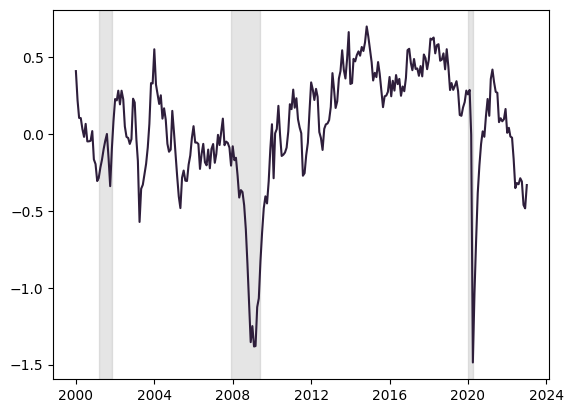

In [ ]:
index_numeric = df["LEI"].index.to_timestamp()

plt.plot(index_numeric, df["LEI"])

recession_periods = [('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01'), ('2020-01-01','2020-04-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)


<img src="https://www.conference-board.org/images/products/data/COVID-19-US-LEI-Aug21-847.png" alt="LEI" height="400">

In [ ]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 35.8 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=3666ee375a3f0c82684a7f19786a5a7c2275f0216600dfbc5c06a589c777727d
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


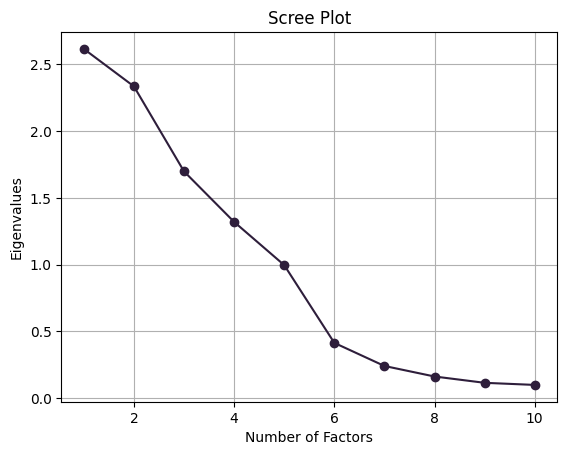

In [ ]:
from factor_analyzer import FactorAnalyzer
# Create a factor analyzer object
factor_analyzer = FactorAnalyzer()

# Fit the factor analysis model to the data
factor_analyzer.fit(all_index)

# Obtain the eigenvalues
eigenvalues = factor_analyzer.get_eigenvalues()[0]

# Plot the scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Assuming you have your 10 component data stored in a variable called 'data'

# Create a factor analysis object with the desired number of factors/components
n_components = 4  # Adjust the number of components as needed
factor_analysis = FactorAnalysis(n_components=n_components, random_state=0)

# Fit the factor analysis model to the data
factor_analysis.fit(all_index)

# Access the factor loadings or coefficients for each component
factor_loadings = factor_analysis.components_

factor_loading1 = -factor_loadings[0]
factor_loading2 = -factor_loadings[1]
factor_loading3 = -factor_loadings[2]
factor_loading4 = -factor_loadings[3]

# Print the factor loadings for each component
for component_idx, component_loading in enumerate(factor_loadings):
    print(f"Factor Loadings for Component {component_idx + 1}: {component_loading}")

Factor Loadings for Component 1: [-6.81685482e-01 -5.43299986e-01  6.37615174e-04 -1.18874288e-01
 -4.48987703e-01 -2.27060029e-01 -5.13833917e-01  6.88098029e-02
  4.11596482e-01  2.85758063e-01]
Factor Loadings for Component 2: [-0.65054722  0.27300756 -0.04191846  0.69019189 -0.03872168  0.61620181
 -0.42956702  0.21275127 -0.04438666 -0.1568232 ]
Factor Loadings for Component 3: [ 0.43953184  0.20024866  0.06360288  0.01498257 -0.38157272  0.27066526
  0.12109685 -0.0574141   0.13437946 -0.68451722]
Factor Loadings for Component 4: [-0.11870352 -0.42482268 -0.01984546 -0.08858577  0.02030226 -0.01040498
  0.79544883  0.41893419 -0.01417054 -0.47203061]


NameError: ignored

In [ ]:
df["New_LEI1"] = factor_loading1[0] * df["Standardized_index1"] + factor_loading1[1] * df["Standardized_index2"] + factor_loading1[2] * df["Standardized_index3"] +\
factor_loading1[3] * df["Standardized_index4"] + factor_loading1[4] * df["Standardized_index5"] + factor_loading1[5] * df["Standardized_index6"] + \
factor_loading1[6] * df["Standardized_index7"] + factor_loading1[7] * df["Standardized_index8"] + factor_loading1[8] * df["Standardized_index9"] + factor_loading1[9] * df["Standardized_index0"]

# df["New_LEI"] = zscore(df["New_LEI"])
df.head(5)

,Standardized_index0,Standardized_index1,Standardized_index2,Standardized_index3,Standardized_index4,Standardized_index5,Standardized_index6,Standardized_index7,Standardized_index8,Standardized_index9,LEI,New_LEI,New_LEI1,New_LEI2,New_LEI3,New_LEI4
Date,,,,,,,,,,,,,,,,
2000-01,2.094145,0.0,2.565682,-0.817285,0.612232,0.605348,0.938108,0.0,-0.059079,-0.756434,0.406807,1.954452,1.669028,1.404487,1.037841,2.127979
2000-02,2.036356,0.0,0.168551,-0.853812,0.409058,-0.003040,0.846411,0.0,-0.102960,-1.101270,0.216773,0.637404,0.210024,0.593441,1.320167,1.088516
2000-03,1.689620,0.0,-0.380400,-0.801131,0.110271,0.568365,0.738995,0.0,-0.013266,-1.301030,0.102790,0.733858,0.283523,0.229155,1.472973,0.613091
2000-04,1.862988,0.0,-0.489396,-0.791768,0.014659,0.654103,0.597521,0.0,0.086946,-1.457332,0.101465,0.738027,0.227202,0.043588,1.712075,0.592928
2000-05,1.986822,0.0,-0.764004,-0.817888,-0.451448,0.580693,0.456046,0.0,0.084957,-1.408627,0.031014,0.435713,-0.097764,-0.458330,1.864098,0.494455


In [ ]:
df["New_LEI2"] = factor_loading2[0]*df["Standardized_index1"] + factor_loading2[1] * df["Standardized_index2"] + factor_loading2[2] * df["Standardized_index3"] +\
factor_loading2[3] * df["Standardized_index4"] + factor_loading2[4] * df["Standardized_index5"] + factor_loading2[5] * df["Standardized_index6"] + \
factor_loading2[6] * df["Standardized_index7"] + factor_loading2[7] * df["Standardized_index8"] + factor_loading2[8] * df["Standardized_index9"] + factor_loading2[9] * df["Standardized_index0"]

df["New_LEI3"] = factor_loading3[0]*df["Standardized_index1"] + factor_loading3[1] * df["Standardized_index2"] + factor_loading3[2] * df["Standardized_index3"] +\
factor_loading3[3] * df["Standardized_index4"] + factor_loading3[4] * df["Standardized_index5"] + factor_loading3[5] * df["Standardized_index6"] + \
factor_loading3[6] * df["Standardized_index7"] + factor_loading3[7] * df["Standardized_index8"] + factor_loading3[8] * df["Standardized_index9"] + factor_loading3[9] * df["Standardized_index0"]

df["New_LEI4"] = factor_loading4[0]*df["Standardized_index1"] + factor_loading4[1] * df["Standardized_index2"] + factor_loading4[2] * df["Standardized_index3"] +\
factor_loading4[3] * df["Standardized_index4"] + factor_loading4[4] * df["Standardized_index5"] + factor_loading4[5] * df["Standardized_index6"] + \
factor_loading4[6] * df["Standardized_index7"] + factor_loading4[7] * df["Standardized_index8"] + factor_loading4[8] * df["Standardized_index9"] + factor_loading4[9] * df["Standardized_index0"]

(10957.0, 19722.0)

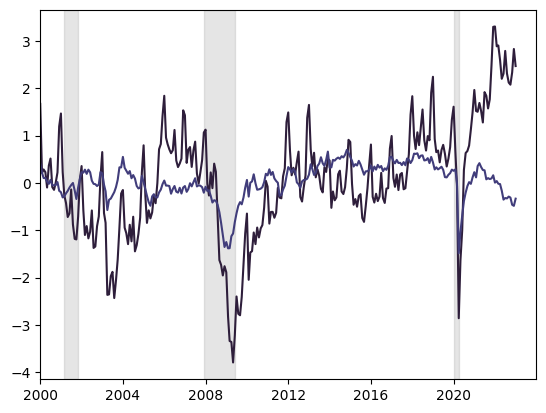

In [ ]:
index_numeric = df["New_LEI"].index.to_timestamp()

plt.plot(index_numeric, df["New_LEI1"])
# plt.plot(index_numeric, df["New_LEI2"])
# plt.plot(index_numeric, df["New_LEI3"])
# plt.plot(index_numeric, df["New_LEI4"])
plt.plot(index_numeric, df["LEI"])
# plt.plot(gdp["GDP"])

recession_periods = [('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01'), ('2020-01-01','2020-04-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.xlim(datetime.strptime('2000-01-01', '%Y-%m-%d'), datetime.strptime('2023-12-31', '%Y-%m-%d'))

<img src="https://www.conference-board.org/images/products/data/COVID-19-US-LEI-Aug21-847.png" alt="LEI" height="400">

(10957.0, 19722.0)

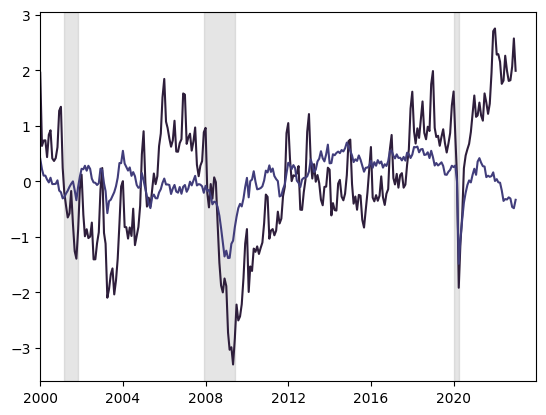

In [ ]:
index_numeric = df["New_LEI"].index.to_timestamp()

plt.plot(index_numeric, df["New_LEI"])
plt.plot(index_numeric, df["LEI"])
# plt.plot(gdp["GDP"])

recession_periods = [('2001-03-01', '2001-11-01'), ('2007-12-01', '2009-06-01'), ('2020-01-01','2020-04-01')]

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.xlim(datetime.strptime('2000-01-01', '%Y-%m-%d'), datetime.strptime('2023-12-31', '%Y-%m-%d'))

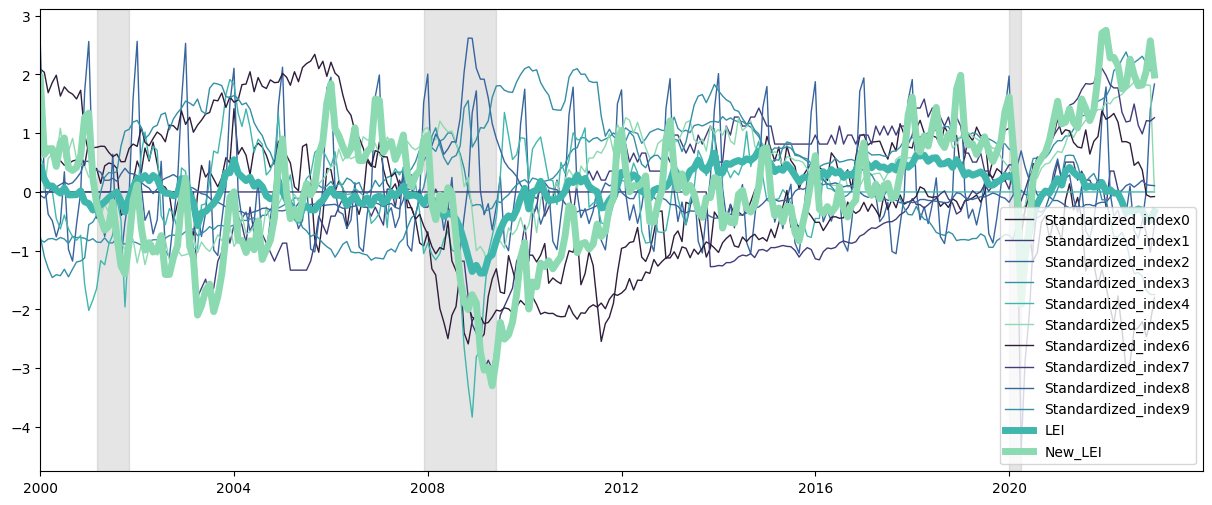

In [ ]:
plt.figure(figsize=(15,6))
for column in df.columns:
  w = 1
  if column == "LEI" or column == "New_LEI":
    w = 5

  plt.plot(index_numeric, df[column], linewidth = w, label = column)

plt.legend()

for period in recession_periods:
    plt.axvspan(period[0], period[1], color='gray', alpha=0.2)

plt.xlim(datetime.strptime('2000-01-01', '%Y-%m-%d'), datetime.strptime('2023-12-31', '%Y-%m-%d'))
plt.show()

(10957.0, 18627.0)

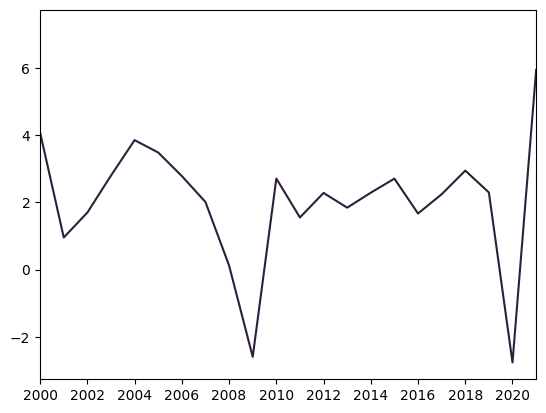

In [ ]:
gdp = pd.read_csv("Indexes/gdp.csv")

from datetime import datetime

gdp["Date"] = pd.to_datetime(gdp['year'], format='%Y')
gdp = gdp.set_index('Date')

plt.plot(gdp["GDP"])
plt.xlim(datetime.strptime('2000-01-01', '%Y-%m-%d'), datetime.strptime('2020-12-31', '%Y-%m-%d'))